In [1]:
algorithm   = 'DR-'
out_folder = 'Test/'

# Test

Previously, you could test the runner here as well (do not run):

In [42]:
import numpy  as np
import os
folder = 'Microscopy_Sized'
path = 'Exact/' + folder + '/'
files = [f[:-9] for f in os.listdir(path) if f.endswith('.txt')]
instance = files[1]
full_path = path + instance
m = np.load(full_path + '_m.npy');    M = m.size
n = np.load(full_path + '_n.npy');    N = n.size
c = np.load(full_path + '_Cost.npy')

In [ ]:
from DOTSolver import Runner

Set parameter Username
Academic license - for non-commercial use only - expires 2022-10-17
Set parameter IntFeasTol to value 1e-09
Set parameter FeasibilityTol to value 1e-09
Set parameter OptimalityTol to value 1e-09
Discarded solution information
Set parameter Method to value 0
Set parameter Presolve to value 0
Gurobi Optimizer version 9.5.0 build v9.5.0rc5 (mac64[rosetta2])
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 128 rows, 4096 columns and 8192 nonzeros
Model fingerprint: 0xea510306
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [2e-02, 2e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [2e-03, 5e-02]
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.3555584e+00   9.837282e-01   3.969004e+09      0s
     597    1.6271821e-02   0.000000e+00   0.000000e+00      0s

Solved in 597 iterations and 0.01 seconds (0.00 work units)
Optimal objective  1.627182145e-02

**

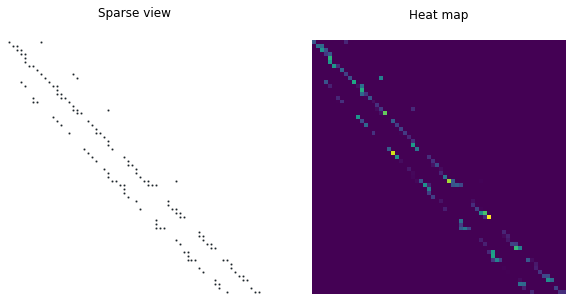

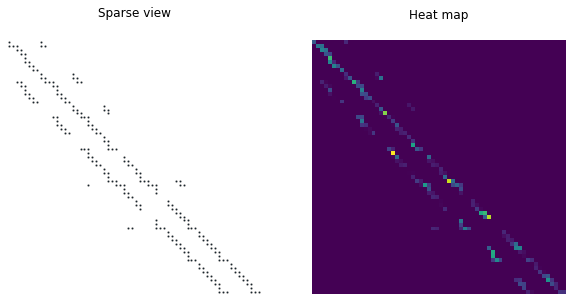

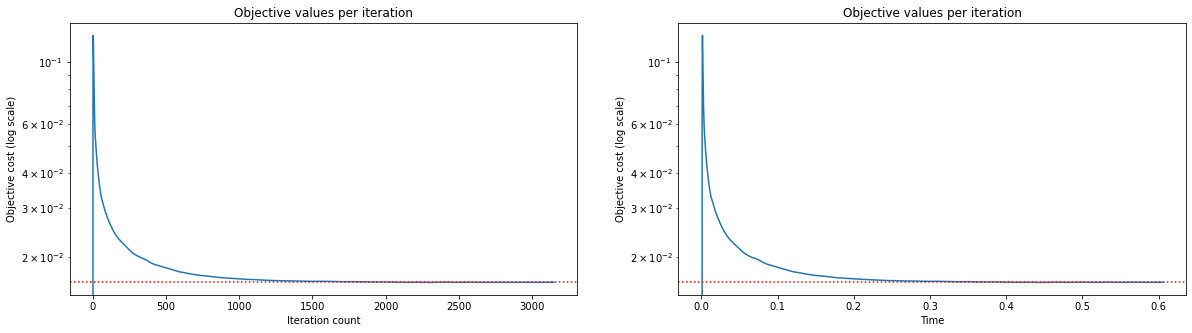

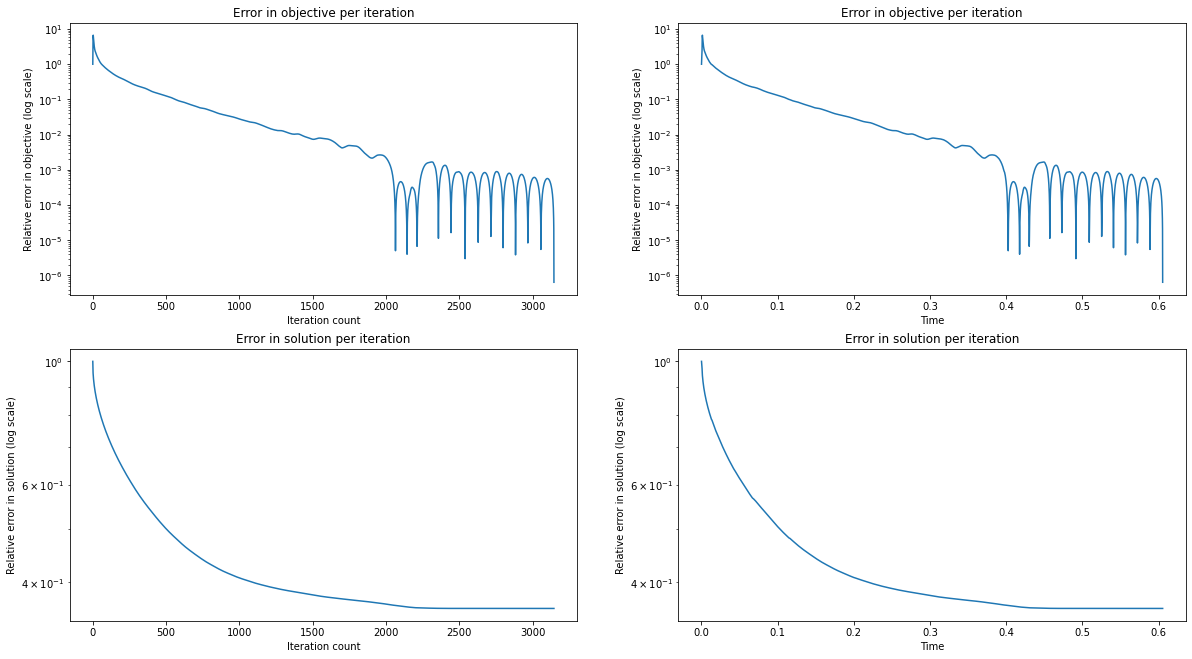

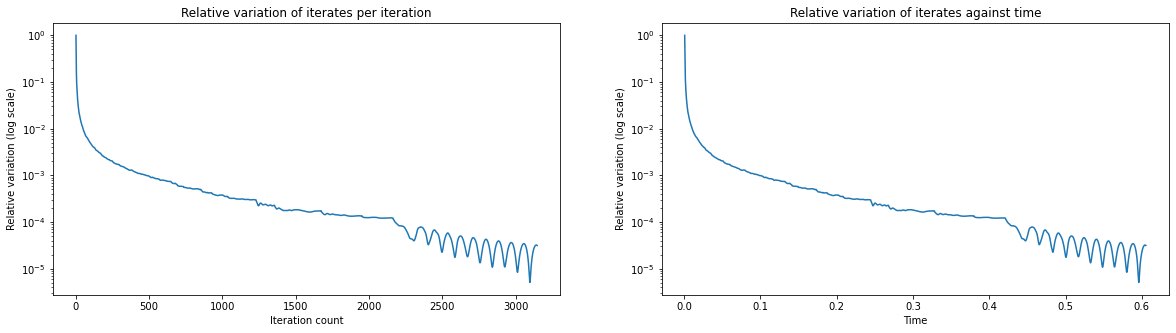

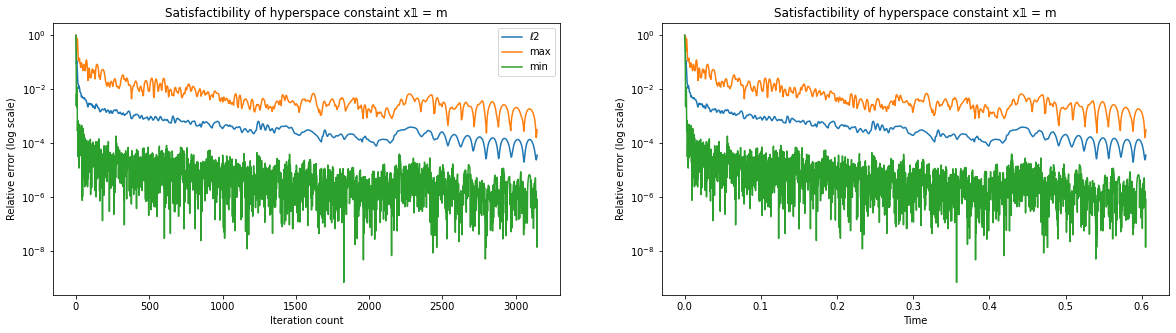

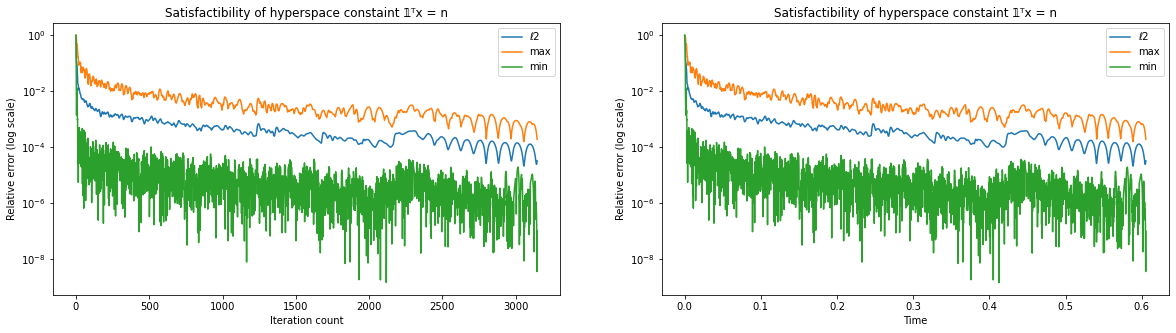

,it,obj,tol,dist_obj,time,dist_x
0,61,0.032404,1.000000,9.914352e-01,0.013231,0.786519
1,564,0.017897,0.100000,9.989666e-02,0.115091,0.480716
2,1417,0.016434,0.010000,9.979121e-03,0.279466,0.382831
3,2039,0.016288,0.001000,9.646616e-04,0.396844,0.364144
4,2062,0.016273,0.000100,8.441801e-05,0.401794,0.363473
5,2065,0.016272,0.000010,5.052987e-06,0.402656,0.363387
6,3146,0.016272,0.000001,6.413791e-07,0.605278,0.358930


,it,obj,dist_obj,time,dist_x,rel_var,hyperₘ-L2,hyperₘ-max,hyperₘ-min,hyperₙ-L2,hyperₙ-max,hyperₙ-min
0,0,0.000000,1.000000,0.000244,1.000000,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1,0.057901,2.558374,0.000957,0.971075,1.000000,0.559199,0.991524,0.312757,0.545101,0.915679,0.392403
2,2,0.118045,6.254542,0.001199,0.952866,0.500471,0.165959,0.910408,0.007455,0.159675,0.869282,0.010029
3,3,0.124946,6.678660,0.001416,0.943181,0.233367,0.089796,0.815956,0.002415,0.112461,0.792637,0.003710
4,4,0.115498,6.098018,0.001628,0.935742,0.152880,0.109013,0.500283,0.006897,0.110011,0.498992,0.001395


In [5]:
Runner(m,n,c, M,N, algorithm, out_folder)

---

# `DOT_Solver` as a notebook

Here is everything as it would be in a notebook:

In [4]:
from gurobipy import *

import numpy  as np
import pandas as pd
import time
import os
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

# Particular functions
from numpy import zeros, zeros_like, allclose, where, ones, inf, absolute, linspace, asarray, maximum, minimum
from numpy import empty, divide, exp, isnan, isinf, einsum, indices, double, tile
from numpy.random import default_rng as rng
from numba import jit
from scipy.spatial.distance import cdist
from scipy.linalg import norm
from pandas       import read_csv
from scipy.io     import savemat, loadmat

In [5]:
# Check if out folder exists, else create it
if not os.path.exists(out_folder):    os.makedirs(out_folder)

In [7]:
# Model
start = time.time()
mo = Model()
γ  = {}
γ = mo.addMVar( (M,N), vtype = 'C', name ='g', obj = c, lb = 0.0)

mo.addConstrs( (γ[i,:].sum() == m[i] for i in range(M)), name='m' );
mo.addConstrs( (γ[:,j].sum() == n[j] for j in range(N)), name='n');
end = time.time()

Set parameter Username
Academic license - for non-commercial use only - expires 2022-10-17


In [8]:
mo.Params.IntFeasTol, mo.Params.FeasibilityTol, mo.Params.OptimalityTol = 1e-9, 1e-9, 1e-9
mo.reset();    mo.setParam('Method', 0);    mo.Params.Presolve = 0;    mo.optimize()

Set parameter IntFeasTol to value 1e-09
Set parameter FeasibilityTol to value 1e-09
Set parameter OptimalityTol to value 1e-09
Discarded solution information
Set parameter Method to value 0
Set parameter Presolve to value 0
Gurobi Optimizer version 9.5.0 build v9.5.0rc5 (mac64[rosetta2])
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 128 rows, 4096 columns and 8192 nonzeros
Model fingerprint: 0xea510306
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [2e-02, 2e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [2e-03, 5e-02]
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.3555584e+00   9.837282e-01   3.969004e+09      0s
     597    1.6271821e-02   0.000000e+00   0.000000e+00      0s

Solved in 597 iterations and 0.01 seconds (0.00 work units)
Optimal objective  1.627182145e-02


In [9]:
Exact_performance = { 'Builder': end-start, 'Simplex': mo.RunTime, 'Obj': mo.ObjVal}

In [10]:
sol = γ.x
obj_exact = mo.ObjVal

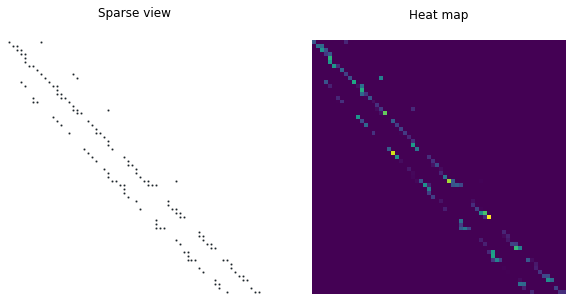

In [11]:
# Visualise solution
plt.figure(figsize = (10,5))

plt.subplot(1, 2, 1)
plt.spy(sol, markersize=1, aspect = 1, markeredgecolor = 'black', alpha=0.75);    plt.axis('off')
plt.title('Sparse view')
plt.subplot(1, 2, 2)
plt.imshow(sol);    plt.axis('off');    plt.title('Heat map\n')

plt.savefig(out_folder+'Exact-Sparse-Heat.pdf', bbox_inches='tight',transparent=True);

In [12]:
np.save(out_folder + 'Cost',   c)    # Cost matrix c
np.save(out_folder + 'm'   ,   m)    # Source measure m
np.save(out_folder + 'n'   ,   n)    # Target measure m
np.save(out_folder + 'Exact-Sol' , sol)    # Solution

In [13]:
with open(out_folder + 'Exact_Time.txt', 'w') as f:    print(Exact_performance, file=f)

In [14]:
savemat(out_folder + 'Exact-Sol.mat', mdict={'sol': sol})

In [15]:
# Algorithms: copy & paste from notebooks if there is a change 
# !!! Modify in notebooks first to keep track of changes !!!
'''
    Primal-Dual (PD)
'''
def primal_dual_improved(c,m,n,iters, collect_obj = False, true_obj = None, true_obj_tol = 1e-4, true_solution = None, save_iter = False):
    #Algorithm for calculating solution x, in the primal space
    #and y_1, y_2 in the dual space.
    #Also returns the value of the objective function c*x at each
    #iteration.
    
    '''
        Initialise parameters
    '''
    #Initialise τ
    τ = 0.001
    
    #Initialise σ
    σ = 1/τ - 0.5
    
    #Initialise ρ
    ρ = 1.9
    
    #fetch lengths of m and n.
    N = n.size
    M = m.size
    
    print('\n*** Primal Dual with M = {}, N = {}, MN = {} ***\n\n'.format(M,N,M*N))
    
    
    '''
        Initialise matrices
    '''
    #Initialise x & y
    x, y = zeros((2,M,N));            #y[0,:] = n;    y[:,0] = m
    #Initialise xₖ, yₖ, xₚ
    xₖ, yₖ, xₚ = zeros((3,M,N))
    
    '''
        Information from true solution (if available)
    '''
    # Store current objective value
    if collect_obj == True:
        obj = [(c*x).sum()]
    
    # Norm of true solution
    if true_solution is not None:
        true_obj_crit = 1.0
        if true_obj is None:
            true_obj = (c*sol).sum()
        print('Objective from ground truth:', obj_exact,'\n')
        
    '''
        Iterate the Primal Dual scheme
    '''
    
    every_iter = {
        'it':[], 'obj':[], 'dist_obj':[], 'time':[], 'dist_x':[], 'rel_var':[], 
        'hyperₘ':{'L2': [], 'max': [], 'min':[]}, 'hyperₙ':{'L2': [], 'max': [], 'min':[]}
                 }
    every_critical = {'it':[], 'obj':[], 'tol':[], 'dist_obj':[], 'time':[], 'dist_x':[]}
    
    if true_solution is not None:
        print('     It  |  Tolerance |        Time       | Frob. dist. ')
        print( '{:-^55}'.format('') )
        
    start = time.time()
    
    for k in range(iters):
        
        xₖ = x - τ * (c + y)
        xₖ = where(xₖ < 0, 0, xₖ)
        
        u = (y + σ * (2.0 * xₖ - x))/σ
        
        κ_1 = u.sum(1) 
        κ_2 = u.sum(0)
        
        β_1 = (κ_1-m).sum() / (M + N)
        β_2 = (κ_2-n).sum() / (M + N)
               
        yₖ = σ*(tile( ((κ_1 -m)- β_1)/N, (N,1)).T + tile( ((κ_2 - n) - β_2)/M, (M,1)))
        
    
        #Reset x and y for the next iteration
        x = ρ*xₖ + (1 - ρ)*x
        y = ρ*yₖ + (1 - ρ)*y
        
        # Measure time up to this point!
        end = time.time()
        
        # Update objective function
        if collect_obj == True:
            obj.append( (c*x).sum() )
            # Compute relative objective distance
            if true_solution is not None:
                dist_true_sol = abs(obj[-1] - true_obj)/true_obj
        
        # If all iterations are to be stored:
        if save_iter == True:
            frob_d = norm(sol-x, 'fro')/norm(sol, 'fro')
            r, s   = x.sum(1) - m, x.sum(0) - n
            
            every_iter['it'].append( k )
            every_iter['obj'].append( (c*x).sum() )
            every_iter['dist_obj'].append( dist_true_sol if true_obj is not None else np.nan )
            every_iter['time'].append( end-start )
            every_iter['dist_x'].append( frob_d )
            every_iter['rel_var'].append( norm(xₚ-x, 'fro')/norm(x, 'fro') if not allclose(x,0) else np.nan )
            # Constrained satisfactibility
            every_iter['hyperₘ']['L2'].append( norm(r)/norm(m) )
            every_iter['hyperₘ']['max'].append( abs(r/maximum(m,1e-7)).max() )
            every_iter['hyperₘ']['min'].append( abs(r/maximum(m,1e-7)).min() )
            every_iter['hyperₙ']['L2'].append( norm(s)/norm(n) )
            every_iter['hyperₙ']['max'].append( abs(s/maximum(n,1e-7)).max() )
            every_iter['hyperₙ']['min'].append( abs(s/maximum(n,1e-7)).min() )
            
        # If a true solution is available, we check the tolerance:
        if true_solution is not None: 
            if dist_true_sol < true_obj_crit:
                frob_d = norm(sol-x, 'fro')/norm(sol, 'fro')
                
                every_critical['it'].append( k )
                every_critical['obj'].append( obj[-1] )
                every_critical['tol'].append( true_obj_crit )
                every_critical['dist_obj'].append( dist_true_sol )
                every_critical['time'].append( end-start )
                every_critical['dist_x'].append( frob_d )
                
                print('* {0:6.0f} |    {1:.1e} | {2:15.2f} s |    {3:4.4f}'.format(k,true_obj_crit,
                                                                                   end-start,frob_d))
                
                # If the prescribed tolerance is reached, we finish.
                if dist_true_sol < true_obj_tol:
                    print('Solution found with given tolerance.')
                    break
                
                # Adjust current level of inner tolerance
                true_obj_crit *= 0.1
        
        # Update previous step
        xₚ = x.copy()
                
    if true_solution is not None:
        print( '{:-^55}'.format('') )
        
    print('\nAlgorithm stopped after {0:.4f} seconds and {1} iterations'.format(end-start,k))
    
    
    if collect_obj == False and save_iter == True:
        return x, every_iter
    if collect_obj == True and save_iter == True:
        return x, obj, every_critical, every_iter
    else:
        return x
    
'''
    Douglas-Rachford (DR)
'''
def douglas_rachford(c,m,n,iters, collect_obj = False, 
                                                 true_obj = None,
                                             true_obj_tol = 1e-4, true_solution = None, save_iter = False):
    # Algorithm for calculating solution x, in the primal space
    # and y_1, y_2 in the dual space.
    # Also returns the value of the objective function c*x at each
    # iteration.
    
    '''
        Initialise parameters
    '''
    #First compute μ
    μ = norm(c,2)     # 1 -> 10^-1 -> 10^-2 -> ...
    # μ is selected as the midpoint of the interval
    #e = 1/mu #0.5 * 1/mu;        # remove
    # γ->θ does not depend on the current iteration
    θ = 0.001
    # likewise, we do not require a change in λ
    λ = 1.0
    
    # Fetch lengths of m and n
    N = n.size;        M = m.size
    
    print('\n*** Generalised FB with M = {}, N = {}, MN = {} ***\n\n'.format(M,N,M*N))
    
    '''
        Initialise matrices
    '''
    
    # Initialise x
    x = zeros((M,N));    xₚ = zeros((M,N))
    
    ϕ = zeros(M)
    ψ = zeros(N)
    a = x.sum(1) - m
    b = x.sum(0) - n
    α = a.sum() / (M + N)
    
    
    '''
        Information from true solution (if available)
    '''
    # Store current objective value
    if collect_obj == True:
        obj = [(c*x).sum()]
    
    # Norm of true solution
    if true_solution is not None:
        true_obj_crit = 1.0
        if true_obj is None:
            true_obj = (c*sol).sum()
        print('Objective from ground truth:', obj_exact,'\n')
        
    '''
        Iterate the Generalised FB scheme
    '''
    
    every_iter = {
        'it':[], 'obj':[], 'dist_obj':[], 'time':[], 'dist_x':[], 'rel_var':[], 
        'hyperₘ':{'L2': [], 'max': [], 'min':[]}, 'hyperₙ':{'L2': [], 'max': [], 'min':[]}
                 }
    every_critical = {'it':[], 'obj':[], 'tol':[], 'dist_obj':[], 'time':[], 'dist_x':[]}
    
    if true_solution is not None:
        print('     It  |  Tolerance |        Time       | Frob. dist. ')
        print( '{:-^55}'.format('') )
    
    start = time.time()    
    for k in range(iters):
        
        x += tile(ϕ, (N,1)).T + tile(ψ, (M,1)) - θ*c
        x = where(x<0,0,x)
        
        r = x.sum(1) - m
        s = x.sum(0) - n
        β = r.sum() / (M + N)
        
        ϕ = (a - 2 * r + (2 * β - α)) / N
        ψ = (b - 2 * s + (2 * β - α)) / M
        
        a -= r
        b -= s
        α -= β
        
        # Measure time up to this point!
        end = time.time()
        
        # Update objective function
        if collect_obj == True:
            obj.append( (c*x).sum() )
            #print((c*x).sum())
            # Compute relative objective distance
            if true_solution is not None:
                dist_true_sol = abs(obj[-1] - true_obj)/true_obj
        
        # If all iterations are to be stored:
        if save_iter == True:
            frob_d = norm(sol-x, 'fro')/norm(sol, 'fro')
            every_iter['it'].append( k )
            every_iter['obj'].append( (c*x).sum() )
            every_iter['dist_obj'].append( dist_true_sol if true_obj is not None else np.nan )
            every_iter['time'].append( end-start )
            every_iter['dist_x'].append( frob_d )
            every_iter['rel_var'].append( norm(xₚ-x, 'fro')/norm(x, 'fro') if not allclose(x,0) else np.nan )
            # Constrained satisfactibility
            every_iter['hyperₘ']['L2'].append( norm(r)/norm(m) )
            every_iter['hyperₘ']['max'].append( abs(r/maximum(m,1e-7)).max() )
            every_iter['hyperₘ']['min'].append( abs(r/maximum(m,1e-7)).min() )
            every_iter['hyperₙ']['L2'].append( norm(s)/norm(n) )
            every_iter['hyperₙ']['max'].append( abs(s/maximum(n,1e-7)).max() )
            every_iter['hyperₙ']['min'].append( abs(s/maximum(n,1e-7)).min() )
            
           #print(dist_true_sol) 
            
        # If a true solution is available, we check the tolerance:
        if true_solution is not None: 
            if dist_true_sol < true_obj_crit:
                frob_d = norm(sol-x, 'fro')/norm(sol, 'fro')
                
                every_critical['it'].append( k )
                every_critical['obj'].append( obj[-1] )
                every_critical['tol'].append( true_obj_crit )
                every_critical['dist_obj'].append( dist_true_sol )
                every_critical['time'].append( end-start )
                every_critical['dist_x'].append( frob_d )
                
                print('* {0:6.0f} |    {1:.1e} | {2:15.2f} s |    {3:4.4f}'.format(k,true_obj_crit,
                                                                                   end-start,frob_d))
                
                # If the prescribed tolerance is reached, we finish.
                if dist_true_sol < true_obj_tol:
                    print('Solution found with given tolerance.')
                    break
                
                # Adjust current level of inner tolerance
                true_obj_crit *= 0.1
        
        # Update previous step
        xₚ = x.copy()
        
    if true_solution is not None:
        print( '{:-^55}'.format('') )
        
    print('\nAlgorithm stopped after {0:.4f} seconds and {1} iterations'.format(end-start,k))
    
    
    if collect_obj == False and save_iter == True:
        return x, every_iter
    if collect_obj == True and save_iter == True:
        return x, obj, every_critical, every_iter
    else:
        return x
'''
    Entropic Regularisation (ER)
'''
def sinkhorn_knopp(M,a,b, reg, numItermax=1000,
                   stopThr=1e-9, verbose=False,collect_obj = False, 
                   true_obj = None, true_obj_tol = 1e-4,
                   true_solution = None, save_iter = False, **kwargs):
    r"""
    Solve the entropic regularization optimal transport problem and return the OT matrix
    The function solves the following optimization problem:
    .. math::
        γ = argmin_γ <γ,M>_F + reg\cdot Ω(γ)
        s.t. γ 1 = a
             γᵀ1 = b
             γ   ≥ 0
    where :
    - M is the (dim_a, dim_b) metric cost matrix
    - Ω is the entropic regularization term `Ω(γ) = Σ_{i,j} γ_{i,j} log(γ_{i,j})`
    - a and b are source and target weights (histograms, both sum to 1)
    The algorithm used for solving the problem is the Sinkhorn-Knopp matrix scaling algorithm as proposed in [2]
    Parameters
    ----------
    a : ndarray, shape (dim_a,)
        samples weights in the source domain
    b : ndarray, shape (dim_b,) or ndarray, shape (dim_b, n_hists)
        samples in the target domain, compute sinkhorn with multiple targets
        and fixed M if b is a matrix (return OT loss + dual variables in log)
    M : ndarray, shape (dim_a, dim_b)
        loss matrix
    reg : float
        Regularization term >0
    numItermax : int, optional
        Max number of iterations
    stopThr : float, optional
        Stop threshol on error (>0)
    verbose : bool, optional
        Print information along iterations
    log : bool, optional
        record log if True
    Returns
    -------
    gamma : ndarray, shape (dim_a, dim_b)
        Optimal transportation matrix for the given parameters
    log : dict
        log dictionary return only if log==True in parameters
    References
    ----------
    .. [2] M. Cuturi, Sinkhorn Distances: Lightspeed Computation of Optimal Transport, 
                                          Advances in Neural Information Processing Systems (NIPS) 26, 2013
    See Also
    --------
    ot.lp.emd : Unregularized OT
    ot.optim.cg : General regularized OT
    """
    #Initialisations
    
    '''a = asarray(a, dtype=np.float64)
    b = asarray(b, dtype=np.float64)
    M = asarray(M, dtype=np.float64)''' 
    x,xₚ = zeros((2,M.shape[0],M.shape[1]))

    if len(a) == 0:
        a = np.ones((M.shape[0],), dtype=np.float64) / M.shape[0]
    if len(b) == 0:
        b = np.ones((M.shape[1],), dtype=np.float64) / M.shape[1]

    # init data
    dim_a = len(a)
    dim_b = len(b)

    if len(b.shape) > 1:
        n_hists = b.shape[1]
    else:
        n_hists = 0
        
    if n_hists:
        u = ones((dim_a, n_hists)) / dim_a
        v = ones((dim_b, n_hists)) / dim_b
    else:
        u = ones(dim_a) / dim_a
        v = ones(dim_b) / dim_b
        
    K = empty(M.shape, dtype=M.dtype);    divide(M, -reg, out=K);    exp(K, out=K)

    # print(np.min(K))
    tmp2 = empty(b.shape, dtype=M.dtype)

    Kp = (1.0 / (a+ 1e-299)).reshape(-1, 1) * K
    cpt = 0
    err = 1
    
    '''
        Information from true solution (if available)
    '''
    # Store current objective value
    if collect_obj == True:
        x   = u.reshape((-1, 1)) * K * v.reshape((1, -1))
        obj = [(M*x).sum()]
    
    # Norm of true solution
    if true_solution is not None:
        true_obj_crit = 1.0
        if true_obj is None:
            true_obj = (M*sol).sum()
        print('Objective from ground truth:', obj_exact,'\n')
       
    
    '''
        Iterate the Entropic Regularisation scheme
    '''
    
    every_iter = {
        'it':[], 'obj':[], 'dist_obj':[], 'time':[], 'dist_x':[], 'rel_var':[], 
        'hyperₘ':{'L2': [], 'max': [], 'min':[]}, 'hyperₙ':{'L2': [], 'max': [], 'min':[]}
                 }
    every_critical = {'it':[], 'obj':[], 'tol':[], 'dist_obj':[], 'time':[], 'dist_x':[]}
    
    if true_solution is not None:
        print('     It  |  Tolerance |        Time       | Frob. dist. ')
        print( '{:-^55}'.format('') )
    
    #Initial Time
    start = time.time()
    
    while (err > stopThr and cpt < numItermax):
        uprev = u
        vprev = v

        KtransposeU = np.dot(K.T, u)
        v = divide(b, (KtransposeU+ 1e-299))
        u = 1. / (np.dot(Kp, v)+ 1e-299)

        if (np.any(KtransposeU == 0)
                or np.any(isnan(u)) or np.any(isnan(v))
                or np.any(isinf(u)) or np.any(isinf(v))):
            # we have reached the machine precision
            # come back to previous solution and quit loop
            print('Warning: numerical errors at iteration', cpt)
            u = uprev
            v = vprev
            break
        if cpt % 10 == 0:
            # we can speed up the process by checking for the error only all
            # the 10th iterations
            if n_hists:
                einsum('ik,ij,jk->jk', u, K, v, out=tmp2)
            else:
                # compute right marginal tmp2= (diag(u)Kdiag(v))^T1
                einsum('i,ij,j->j', u, K, v, out=tmp2)
            err = norm(tmp2 - b)  # violation of marginal
            if verbose:
                if cpt % 200 == 0:
                    print(
                        '{:5s}|{:12s}'.format('It.', 'Err') + '\n' + '-' * 19)
                print('{:5d}|{:8e}|'.format(cpt, err))
        
        # Measure time up to this point!
        end = time.time()
        
        # Compute current 
        x = u.reshape((-1, 1)) * K * v.reshape((1, -1))
        
        # Update objective function
        if collect_obj == True:
            obj.append( (M * x).sum() )
            # Compute relative objective distance
            if true_solution is not None:
                dist_true_sol = abs(obj[-1] - true_obj)/true_obj
        
        # If all iterations are to be stored:
        if save_iter == True:
            frob_d = norm(sol-x, 'fro')/norm(sol, 'fro')
            r, s   = x.sum(1) - a, x.sum(0) - b
            
            every_iter['it'].append(cpt)
            every_iter['obj'].append(obj[-1])
            every_iter['dist_obj'].append( dist_true_sol if true_obj is not None else np.nan )
            every_iter['time'].append( end-start )
            every_iter['dist_x'].append( frob_d )
            every_iter['rel_var'].append( norm(xₚ-x, 'fro')/norm(x, 'fro') if not allclose(x,0) else np.nan )
            # Constrained satisfactibility
            every_iter['hyperₘ']['L2'].append( norm(r)/norm(a) )
            every_iter['hyperₘ']['max'].append( abs(r/maximum(a,1e-7)).max() )
            every_iter['hyperₘ']['min'].append( abs(r/maximum(a,1e-7)).min() )
            every_iter['hyperₙ']['L2'].append( norm(s)/norm(b) )
            every_iter['hyperₙ']['max'].append( abs(s/maximum(b,1e-7)).max() )
            every_iter['hyperₙ']['min'].append( abs(s/maximum(b,1e-7)).min() )
        
        # If a true solution is available, we check the tolerance:
        if true_solution is not None: 
            if dist_true_sol < true_obj_crit:
                frob_d = norm(sol-x, 'fro')/norm(sol, 'fro')
                
                every_critical['it'].append( cpt )
                every_critical['obj'].append( obj[-1] )
                every_critical['tol'].append( true_obj_crit )
                every_critical['dist_obj'].append( dist_true_sol )
                every_critical['time'].append( end-start )
                every_critical['dist_x'].append( frob_d )
                
                print('* {0:6.0f} |    {1:.1e} | {2:15.2f} s |    {3:4.4f}'.format(cpt,true_obj_crit,
                                                                                   end-start,frob_d))
                
                # If the prescribed tolerance is reached, we finish.
                if dist_true_sol < true_obj_tol:
                    print('Solution found with given tolerance.')
                    break
                
                # Adjust current level of inner tolerance
                true_obj_crit *= 0.1
                
                
        # Update previous step
        xₚ = x.copy()
                
        cpt = cpt + 1 #number of iterations

    if true_solution is not None:
        print( '{:-^55}'.format('') )
    
    print('\nAlgorithm stopped after {0:.4f} seconds and {1} iterations'.format(end-start,cpt))
    
    if collect_obj == False and save_iter == True:
        return x, every_iter
    if collect_obj == True and save_iter == True:
        return x, obj, every_critical, every_iter
    else:
        return x

In [21]:
algorithm = 'PD-'
out_folder = 'Test/'


*** Primal Dual with M = 64, N = 64, MN = 4096 ***


Objective from ground truth: 0.016271821448840377 

     It  |  Tolerance |        Time       | Frob. dist. 
-------------------------------------------------------
*     20 |    1.0e+00 |            0.01 s |    0.8277
*     26 |    1.0e-01 |            0.01 s |    0.8057
*    750 |    1.0e-02 |            0.17 s |    0.3826
*   1071 |    1.0e-03 |            0.24 s |    0.3642
*   1080 |    1.0e-04 |            0.25 s |    0.3638
*   1081 |    1.0e-05 |            0.25 s |    0.3637
*   1833 |    1.0e-06 |            0.40 s |    0.3589
*   8140 |    1.0e-07 |            1.74 s |    0.3589
Solution found with given tolerance.
-------------------------------------------------------

Algorithm stopped after 1.7402 seconds and 8140 iterations


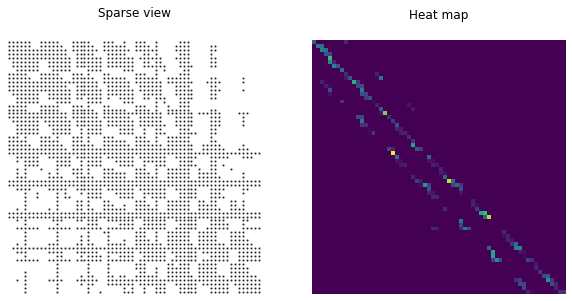

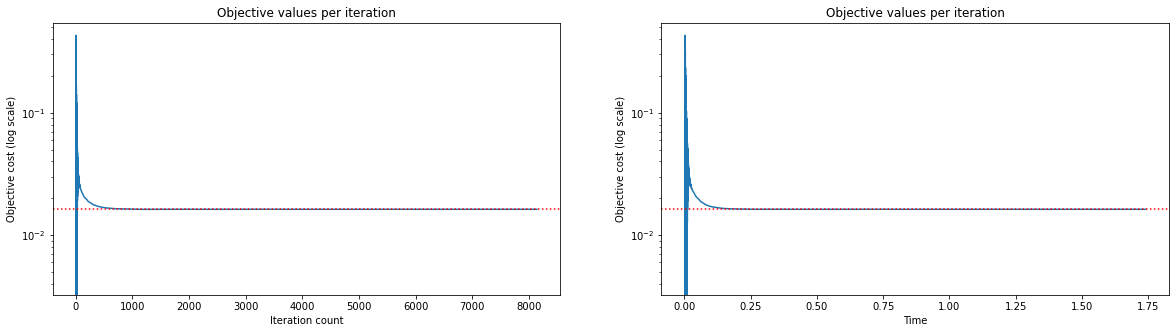

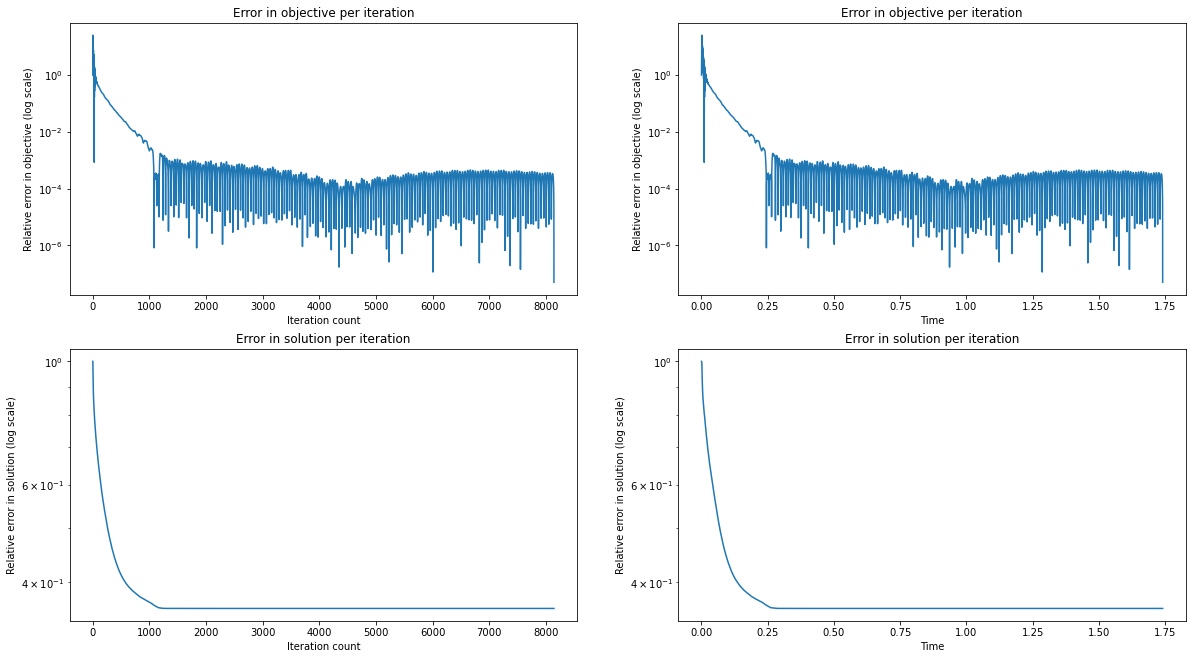

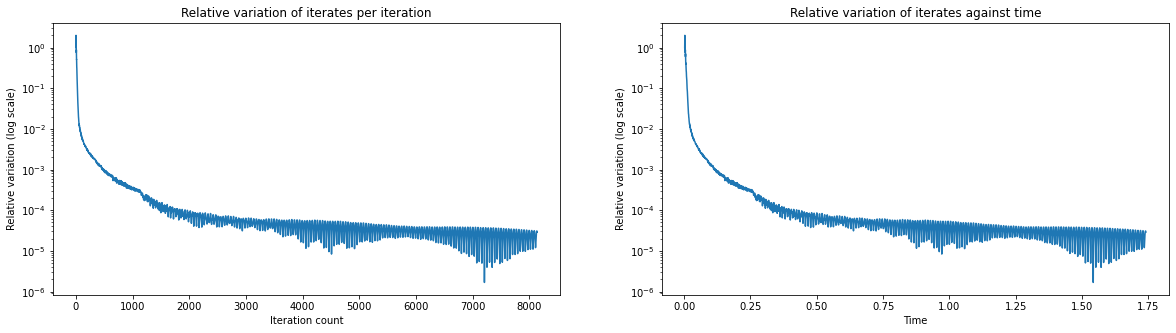

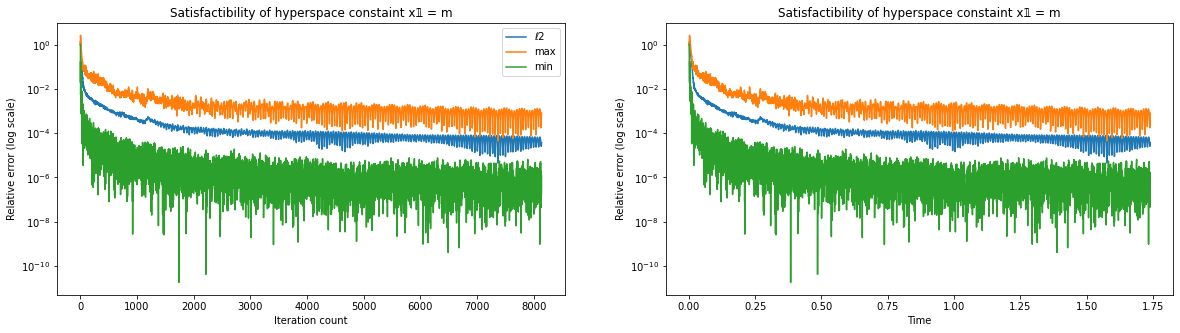

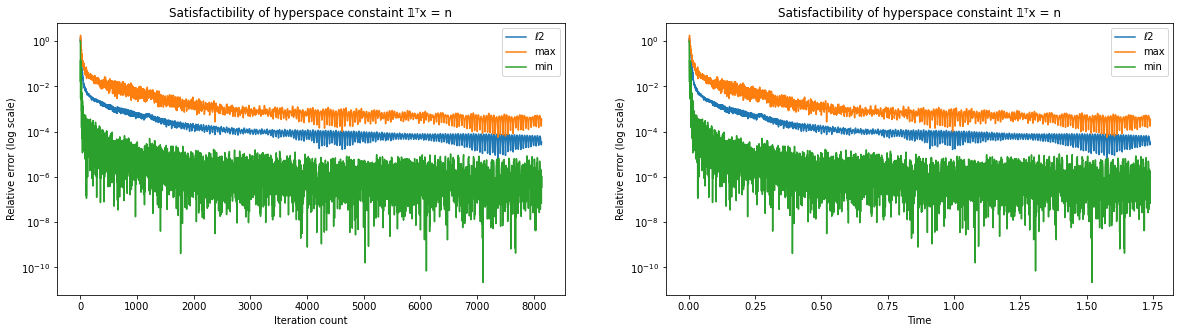

,it,obj,tol,dist_obj,time,dist_x
0,20,0.004110,1.000000e+00,7.473931e-01,0.009030,0.827667
1,26,0.016258,1.000000e-01,8.445832e-04,0.011358,0.805729
2,750,0.016434,1.000000e-02,9.973055e-03,0.173693,0.382565
3,1071,0.016287,1.000000e-03,9.488914e-04,0.243107,0.364231
4,1080,0.016273,1.000000e-04,9.637775e-05,0.245494,0.363761
5,1081,0.016272,1.000000e-05,8.254818e-07,0.245841,0.363710
6,1833,0.016272,1.000000e-06,8.186380e-07,0.403976,0.358903
7,8140,0.016272,1.000000e-07,5.025872e-08,1.740154,0.358902


,it,obj,dist_obj,time,dist_x,rel_var,hyperₘ-L2,hyperₘ-max,hyperₘ-min,hyperₙ-L2,hyperₙ-max,hyperₙ-min
0,0,0.000000,1.000000,0.001138,1.000000,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1,0.429072,25.369015,0.002238,0.995735,1.000000,1.369699,2.036308,0.086689,1.384806,1.797270,0.029731
2,2,-0.122430,8.524029,0.002762,0.980202,1.993502,1.351193,2.624691,0.019698,1.221135,1.815521,0.016050
3,3,0.315424,18.384654,0.003112,0.957490,1.102713,1.272243,2.449062,0.175094,1.032333,1.775681,0.144847
4,4,-0.105567,7.487717,0.003443,0.936679,1.547589,1.047288,2.180295,0.005290,0.730081,1.312823,0.002928


In [22]:
# Select algorithm
Algorithms = ['ER-','PD-','DR-']
Store_Plots = True
if algorithm in Algorithms:
    '''
        *** Run algorithm ***
    '''
    if algorithm == 'PD-':
        x, obj, every_critical, every_iter = primal_dual_improved(c,m,n, 100000, 
                                                                  collect_obj = True, true_obj = obj_exact, 
                                                                  true_obj_tol = 1e-7, true_solution = sol, 
                                                                  save_iter = True)
    if algorithm == 'DR-':
        x, obj, every_critical, every_iter = douglas_rachford(c,m,n, 1000000, 
                                                                        collect_obj = True, 
                                                                           true_obj = obj_exact,
                                                                       true_obj_tol = 1e-6,
                                                                      true_solution = sol, 
                                                                          save_iter = True)
    if algorithm == 'ER-':
        x, obj, every_critical, every_iter = sinkhorn_knopp(c,m,n,0.0002, numItermax= 10000, 
                                                            collect_obj = True, 
                                                            true_obj = obj_exact,
                                                            true_obj_tol = 1e-7,
                                                            true_solution = sol, save_iter = True)
    
    out_folder += algorithm
    
    '''
        *** Visualisation ***
    '''
    # Visualise solution
    if Store_Plots:
        plt.figure(figsize = (10,5))

        plt.subplot(1, 2, 1)
        plt.spy(x, markersize=1, aspect = 1, markeredgecolor = 'black', alpha=0.75);    plt.axis('off')
        plt.title('Sparse view')
        plt.subplot(1, 2, 2)
        plt.imshow(x);    plt.axis('off');    plt.title('Heat map\n')

        plt.savefig(out_folder+'Sparse-Heat.pdf', bbox_inches='tight',transparent=True);

    # Visualise evolution of objective values
    if Store_Plots:
        plt.figure(figsize = (20,5))

        plt.subplot(1, 2, 1)
        plt.plot(obj)
        plt.axhline(y=obj_exact, color='r', linestyle=':')
        plt.yscale('log');    plt.title('Objective values per iteration')
        plt.xlabel('Iteration count');    plt.ylabel('Objective cost (log scale)')
        plt.subplot(1, 2, 2)
        plt.plot(np.append([0], every_iter['time']),obj)
        plt.axhline(y=obj_exact, color='r', linestyle=':')
        plt.yscale('log')
        plt.title('Objective values per iteration')
        plt.xlabel('Time');    plt.ylabel('Objective cost (log scale)')

        plt.savefig(out_folder+'Objective.pdf', bbox_inches='tight',transparent=True)
    
    # Visualise evolution of relative errors
    if Store_Plots:
        plt.figure(figsize = (20,11))

        plt.subplot(2, 2, 1)
        plt.plot(every_iter['dist_obj'])
        plt.yscale('log')
        plt.title('Error in objective per iteration')
        plt.xlabel('Iteration count');    plt.ylabel('Relative error in objective (log scale)')
        plt.subplot(2, 2, 2)
        plt.plot(every_iter['time'],every_iter['dist_obj'])
        plt.yscale('log')
        plt.title('Error in objective per iteration')
        plt.xlabel('Time');    plt.ylabel('Relative error in objective (log scale)')
        plt.subplot(2, 2, 3)
        plt.plot(every_iter['dist_x'])
        plt.yscale('log')
        plt.title('Error in solution per iteration')
        plt.xlabel('Iteration count');    plt.ylabel('Relative error in solution (log scale)')
        plt.subplot(2, 2, 4)
        plt.plot(every_iter['time'],every_iter['dist_x'])
        plt.yscale('log')
        plt.title('Error in solution per iteration')
        plt.xlabel('Time');    plt.ylabel('Relative error in solution (log scale)')

        plt.savefig(out_folder+'Rel_Error.pdf', bbox_inches='tight',transparent=True)
        
    # Relative variation
    if Store_Plots:
        plt.figure(figsize = (20,5))

        plt.subplot(1, 2, 1)
        plt.plot(every_iter['it'], every_iter['rel_var'])
        plt.yscale('log')
        plt.xlabel('Iteration count');    plt.ylabel('Relative variation (log scale)');
        plt.title('Relative variation of iterates per iteration')

        plt.subplot(1, 2, 2)
        plt.plot(every_iter['time'], every_iter['rel_var'])
        plt.yscale('log')
        plt.xlabel('Time');    plt.ylabel('Relative variation (log scale)');
        plt.title('Relative variation of iterates against time')

        plt.savefig(out_folder+'Relative_Var.pdf', bbox_inches='tight',transparent=True)
        
    # Relative variation for x𝟙 = m
    if Store_Plots:
        plt.figure(figsize = (20,5))

        plt.subplot(1, 2, 1)
        plt.plot(every_iter['it'], every_iter['hyperₘ']['L2'], label='ℓ2')
        plt.plot(every_iter['it'], every_iter['hyperₘ']['max'], label='max')
        plt.plot(every_iter['it'], every_iter['hyperₘ']['min'], label='min')
        plt.yscale('log')
        plt.xlabel('Iteration count');    plt.ylabel('Relative error (log scale)');
        plt.title('Satisfactibility of hyperspace constaint x𝟙 = m')
        plt.legend()

        plt.subplot(1, 2, 2)
        plt.plot(every_iter['time'], every_iter['hyperₘ']['L2'], label='ℓ2')
        plt.plot(every_iter['time'], every_iter['hyperₘ']['max'], label='max')
        plt.plot(every_iter['time'], every_iter['hyperₘ']['min'], label='min')
        plt.yscale('log')
        plt.xlabel('Time');    plt.ylabel('Relative error (log scale)');
        plt.title('Satisfactibility of hyperspace constaint x𝟙 = m')

        plt.savefig(out_folder+'RelE_m.pdf', bbox_inches='tight',transparent=True)
        
    # Relative variation for 𝟙ᵀx = n
    if Store_Plots:
        plt.figure(figsize = (20,5))

        plt.subplot(1, 2, 1)
        plt.plot(every_iter['it'], every_iter['hyperₙ']['L2'], label='ℓ2')
        plt.plot(every_iter['it'], every_iter['hyperₙ']['max'], label='max')
        plt.plot(every_iter['it'], every_iter['hyperₙ']['min'], label='min')
        plt.yscale('log')
        plt.xlabel('Iteration count');    plt.ylabel('Relative error (log scale)');
        plt.title('Satisfactibility of hyperspace constaint 𝟙ᵀx = n');    plt.legend()

        plt.subplot(1, 2, 2)
        plt.plot(every_iter['time'], every_iter['hyperₙ']['L2'], label='ℓ2')
        plt.plot(every_iter['time'], every_iter['hyperₙ']['max'], label='max')
        plt.plot(every_iter['time'], every_iter['hyperₙ']['min'], label='min')
        plt.yscale('log')
        plt.xlabel('Time');    plt.ylabel('Relative error (log scale)');
        plt.title('Satisfactibility of hyperspace constaint 𝟙ᵀx = n');    plt.legend()

        plt.savefig(out_folder+'RelE_n.pdf', bbox_inches='tight',transparent=True)
        plt.show()
    
    '''
        *** Store critical values ***
    '''
    df_critical = pd.DataFrame.from_dict(every_critical)
    df_critical.to_pickle(out_folder+'Critical.pkl') # To read back use pd.read_pickle(file_name)
    df_critical.to_excel(out_folder+'Critical.xlsx')
    display(df_critical)
    
    '''
        *** Store info from all iterations ***
    '''
    df_every = pd.concat([
                 pd.DataFrame.from_dict( {a:b for a,b in every_iter.items() if a not in ['hyperₘ', 'hyperₙ'] } ),
                 pd.DataFrame.from_dict( {'hyperₘ-'+a:b for a,b in every_iter['hyperₘ'].items()} ), 
                 pd.DataFrame.from_dict( {'hyperₙ-'+a:b for a,b in every_iter['hyperₙ'].items()} )], axis = 1)
    df_every.to_pickle(out_folder+'Every.pkl') # To read back use pd.read_pickle(file_name)
    df_every.to_excel(out_folder+'Every.xlsx')
    display(df_every.head())
    
    '''
        *** Store solution ***
    '''
    np.save(out_folder + 'Sol.npy' , x)
    savemat(out_folder + 'Sol.mat', mdict={'sol': x})
    
else:
    print('Algorithm wrongly selected or not implemented.')

---